# Filtering Iris Data with K Nearest Neighbors

Importing the Modules!

In [69]:
import numpy as np
import pandas as pa
import sklearn
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import seaborn as sns
%matplotlib inline

Importing and sorting the data!

In [3]:
iris = pd.read_csv("./UCIMLR/Iris/iris.csv")

In [7]:
#This filters the data out for each type.
irist0 = iris[iris['flower type'] == 0] #Iris Setosa
irist1 = iris[iris['flower type'] == 1] #Iris Versicolour
irist2 = iris[iris['flower type'] == 2] #Iris Virginica

## Preliminary Plots

Below are the plots that compare each of the input variables (two at a time) with color by the type of flower. 

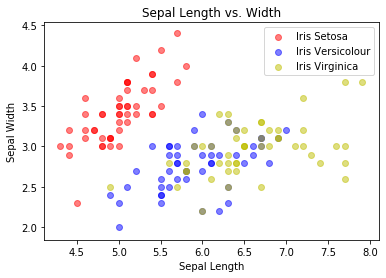

In [8]:
plt.scatter(irist0['sepal length'],irist0['sepal width'],alpha=0.5,color='r',label="Iris Setosa")
plt.scatter(irist1['sepal length'],irist1['sepal width'],alpha=0.5,color='b',label="Iris Versicolour")
plt.scatter(irist2['sepal length'],irist2['sepal width'],alpha=0.5,color='y',label="Iris Virginica")
plt.title("Sepal Length vs. Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

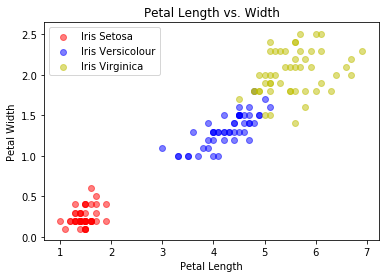

In [9]:
plt.scatter(irist0['petal length'],irist0['petal width'],alpha=0.5,color='r',label="Iris Setosa")
plt.scatter(irist1['petal length'],irist1['petal width'],alpha=0.5,color='b',label="Iris Versicolour")
plt.scatter(irist2['petal length'],irist2['petal width'],alpha=0.5,color='y',label="Iris Virginica")
plt.title("Petal Length vs. Width")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

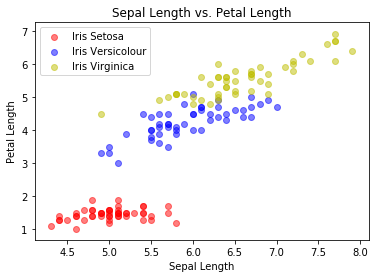

In [10]:
plt.scatter(irist0['sepal length'],irist0['petal length'],alpha=0.5,color='r',label="Iris Setosa")
plt.scatter(irist1['sepal length'],irist1['petal length'],alpha=0.5,color='b',label="Iris Versicolour")
plt.scatter(irist2['sepal length'],irist2['petal length'],alpha=0.5,color='y',label="Iris Virginica")
plt.title("Sepal Length vs. Petal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

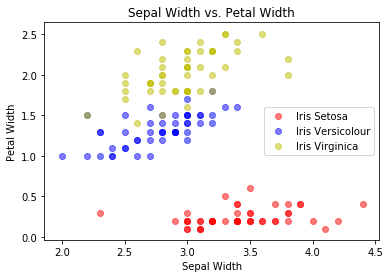

In [11]:
plt.scatter(irist0['sepal width'],irist0['petal width'],alpha=0.5,color='r',label="Iris Setosa")
plt.scatter(irist1['sepal width'],irist1['petal width'],alpha=0.5,color='b',label="Iris Versicolour")
plt.scatter(irist2['sepal width'],irist2['petal width'],alpha=0.5,color='y',label="Iris Virginica")
plt.title("Sepal Width vs. Petal Width")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

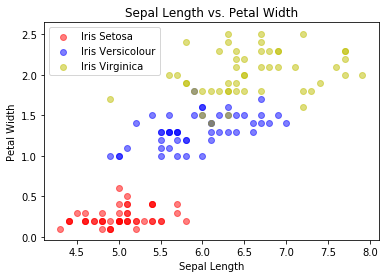

In [12]:
plt.scatter(irist0['sepal length'],irist0['petal width'],alpha=0.5,color='r',label="Iris Setosa")
plt.scatter(irist1['sepal length'],irist1['petal width'],alpha=0.5,color='b',label="Iris Versicolour")
plt.scatter(irist2['sepal length'],irist2['petal width'],alpha=0.5,color='y',label="Iris Virginica")
plt.title("Sepal Length vs. Petal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend()

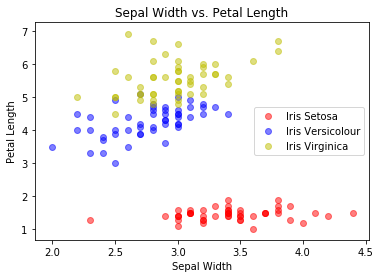

In [13]:
plt.scatter(irist0['sepal width'],irist0['petal length'],alpha=0.5,color='r',label="Iris Setosa")
plt.scatter(irist1['sepal width'],irist1['petal length'],alpha=0.5,color='b',label="Iris Versicolour")
plt.scatter(irist2['sepal width'],irist2['petal length'],alpha=0.5,color='y',label="Iris Virginica")
plt.title("Sepal Width vs. Petal Length")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Length")
plt.legend()

From the plots, it is easy to see that Iris Setosa stands out the most from the other two, but the data for Iris Versicolour and Iris Virginica is not as easy to sort out from the other. 

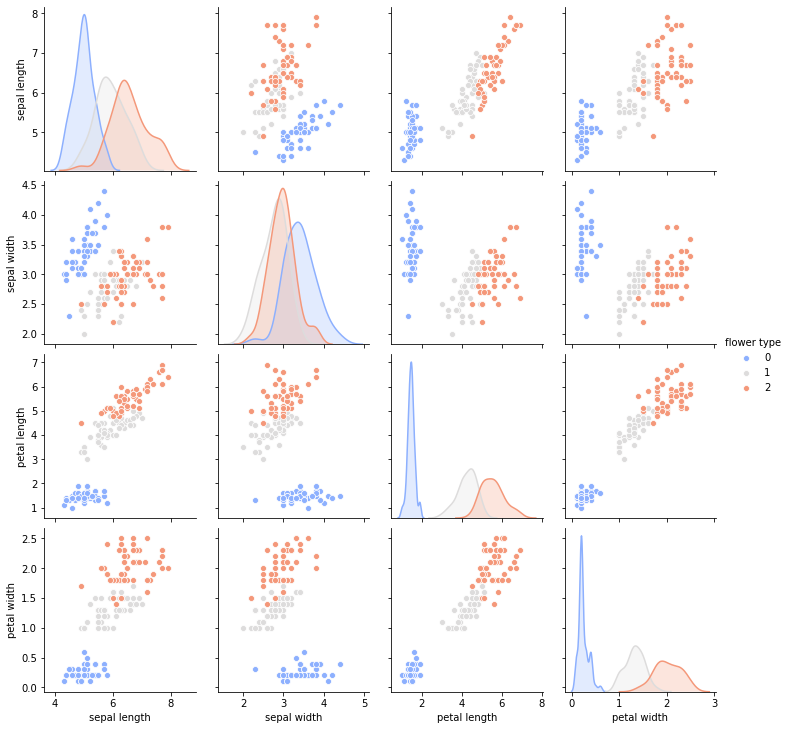

In [71]:
sns.pairplot(iris,hue='flower type',palette='coolwarm')

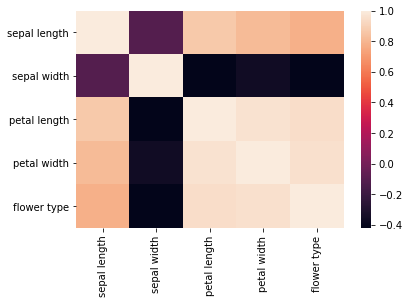

In [72]:
sns.heatmap(iris.corr())

## Setting up the algorithm

In [14]:
# This is the one complicated bit of code in the whole demo.  There is no need to modify it, but please feel free if you want!
def runTest(clf,X,y,trainingPercent=0.66):
    # A little cheat to make the pictures consistent
    np.random.seed(123)
    
    # If there is one thing that I want to harp on, it is the difference
    # between testing and training errors!  So, here we create a training
    # set on which we computer the parameters of our algorithm, and a 
    # testing set for seeing how well we generalize (and work on real 
    # world problems).
    perm = np.random.permutation(len(y))
    n = X.shape[0]
    trainSize = int(trainingPercent*n)
    Xtrain = X[perm[:trainSize],0:2]
    Xtest = X[perm[trainSize:],0:2]

    yHat = y
    yHattrain = yHat[perm[:trainSize]]
    yHattest = yHat[perm[trainSize:]]

    # Run the calculation!
    clf.fit(Xtrain, yHattrain)
    
    # step size in the mesh for plotting the decision boundary.
    h = .02  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    py.figure(1, figsize=(8, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    py.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=yHattrain, cmap=cmap_bold,marker='o')
    py.scatter(Xtest[:, 0], Xtest[:, 1], c=yHattest, cmap=cmap_bold,marker='+')
    py.xlim(xx.min(), xx.max())
    py.ylim(yy.min(), yy.max())
    py.show()

    # Print out some metrics
    print('training score',clf.score(Xtrain,yHattrain))
    print('testing score',clf.score(Xtest,yHattest))

In [42]:
#These define the functions that take the data set and return arrays: the first one gives the data we want as our input and the second one gives the data we want as our output.
def data(X):
    data = np.array(X.iloc[:, :-1])
    return data
def flower_type(X):
    flower_type = np.array(X.iloc[:, -1])
    return flower_type

We are going to use the K Nearest Neighbors Classifier in order to try to sort our data. We are going to run this algorithm on data sets in order to find the training score and testing score when we let k be odd numbers from 1 to 9. 

In [48]:
#This gives an easy way to run the k nearest neighbor analysis with k varying from 1 to 9 (only odd numbers) for the data set that we give it. 
def knna(Z):
    for i in range(1,11,2):
        clf = neighbors.KNeighborsClassifier(n_neighbors=i)
        runTest(clf,data(Z),flower_type(Z),trainingPercent=0.66)
        print("nearest neighbors number is",i)

In order to use the K Nearest Neighbor Classifier, we need to decide which two input variables we are going to use. We can filter out all but two. Doing so gives us six different data sets to look at.

In [53]:
#These define the data sets that just compare two of the input variables.
iris_petal = iris[["petal length","petal width","flower type"]]
iris_sepal = iris[["sepal length","sepal width","flower type"]]
iris_pl_sl = iris[["petal length","sepal length","flower type"]]
iris_pw_sw = iris[["petal width","sepal width","flower type"]]
iris_pl_sw = iris[["petal length","sepal width","flower type"]]
iris_pw_sl = iris[["petal width","sepal length","flower type"]]

## Petal Length vs. Petal Width:

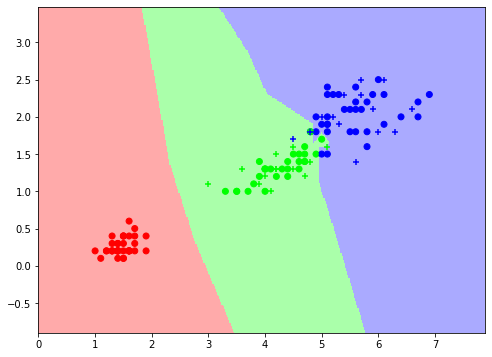

training score 0.98989898989899
testing score 0.9411764705882353
nearest neighbors number is 1


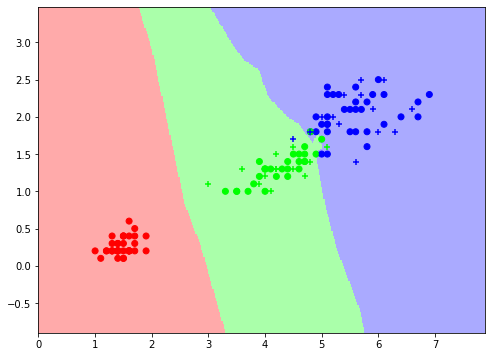

training score 0.9696969696969697
testing score 0.9411764705882353
nearest neighbors number is 3


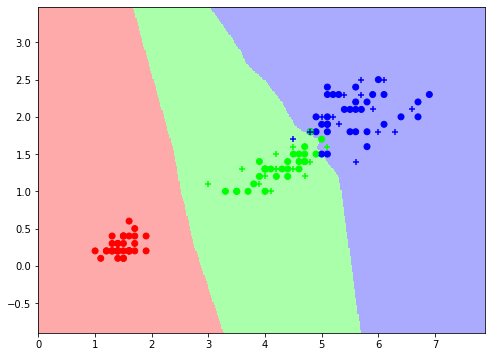

training score 0.9696969696969697
testing score 0.9607843137254902
nearest neighbors number is 5


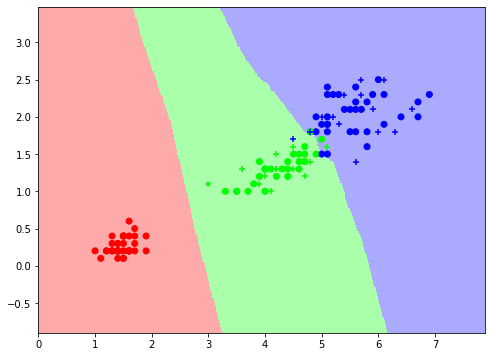

training score 0.9696969696969697
testing score 0.9607843137254902
nearest neighbors number is 7


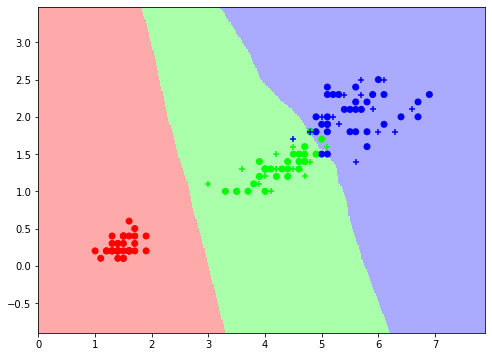

training score 0.9696969696969697
testing score 0.9607843137254902
nearest neighbors number is 9


In [50]:
knna(iris_petal)

Here, the best training score is when k is 1, but we get a nice increase in the testing score when k is  5 (or 7,9). With k=5, we have the training score is about 0.97 and the testing score is about 0.96. 

## Sepal Length vs. Sepal Width

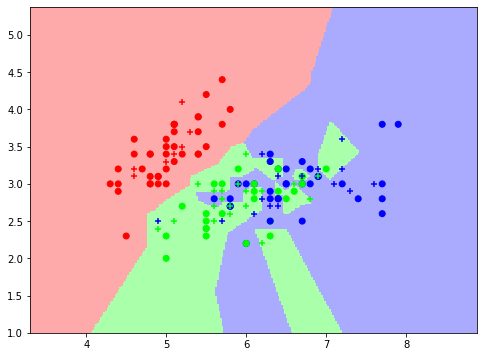

training score 0.9191919191919192
testing score 0.7058823529411765
nearest neighbors number is 1


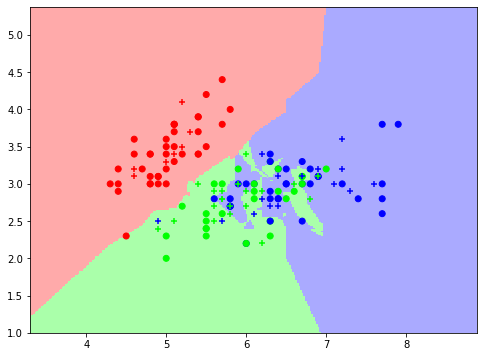

training score 0.8787878787878788
testing score 0.7450980392156863
nearest neighbors number is 3


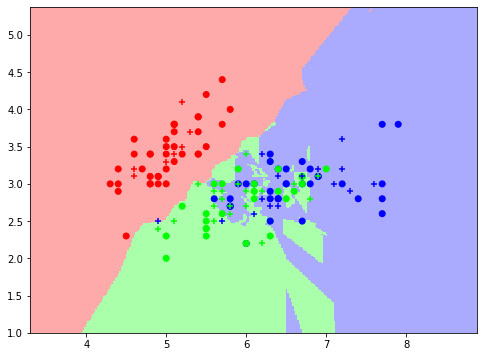

training score 0.8383838383838383
testing score 0.7058823529411765
nearest neighbors number is 5


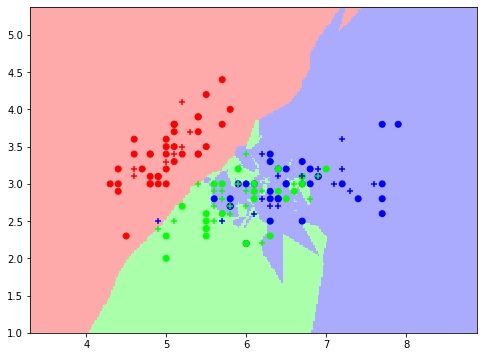

training score 0.7878787878787878
testing score 0.6666666666666666
nearest neighbors number is 7


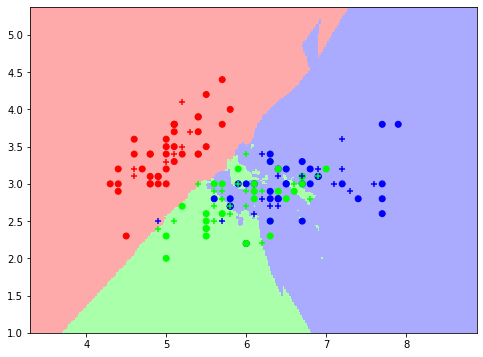

training score 0.7474747474747475
testing score 0.7450980392156863
nearest neighbors number is 9


In [52]:
knna(iris_sepal)

In order to balance out the training score and the testing score, it will be best to take k=3 here, which gives a training score of about 0.88 and a testing score of about 0.75. 

## Petal Width vs Sepal Width

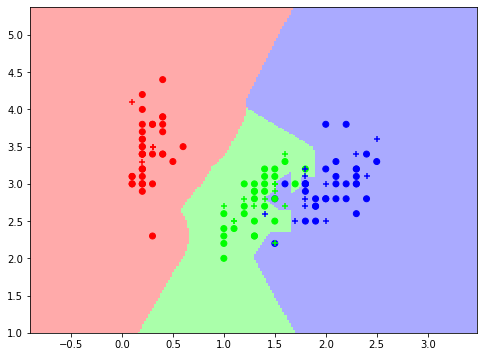

training score 0.98989898989899
testing score 0.9019607843137255
nearest neighbors number is 1


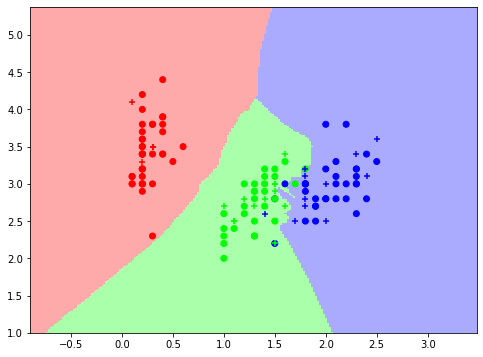

training score 0.9494949494949495
testing score 0.9803921568627451
nearest neighbors number is 3


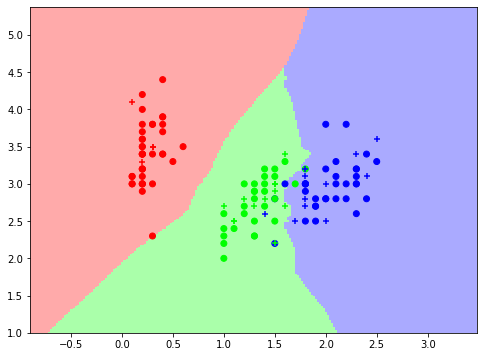

training score 0.9595959595959596
testing score 0.9803921568627451
nearest neighbors number is 5


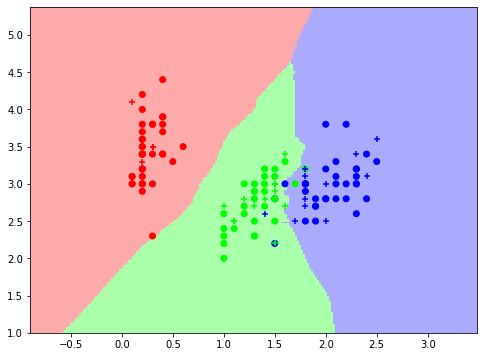

training score 0.9595959595959596
testing score 0.9803921568627451
nearest neighbors number is 7


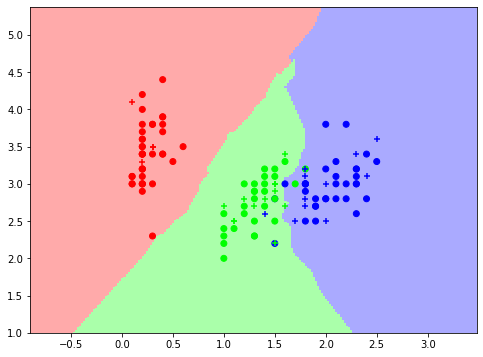

training score 0.9595959595959596
testing score 0.9607843137254902
nearest neighbors number is 9


In [54]:
knna(iris_pw_sw)

In this comparison, it's best to use k=5 (or 7), which gives a training score of about 0.96 and a testing score of about 0.98. 

## Petal Width vs. Sepal Length

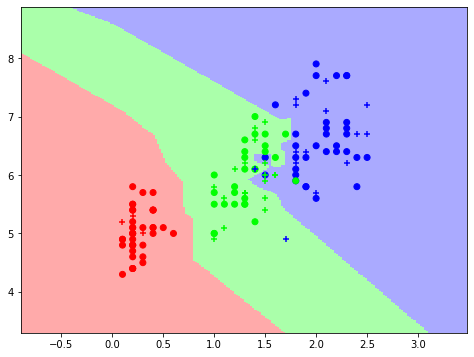

training score 0.9797979797979798
testing score 0.8627450980392157
nearest neighbors number is 1


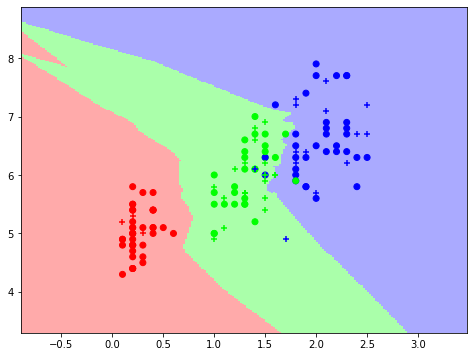

training score 0.9696969696969697
testing score 0.9215686274509803
nearest neighbors number is 3


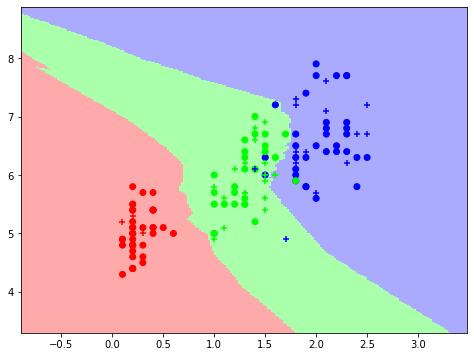

training score 0.9595959595959596
testing score 0.9215686274509803
nearest neighbors number is 5


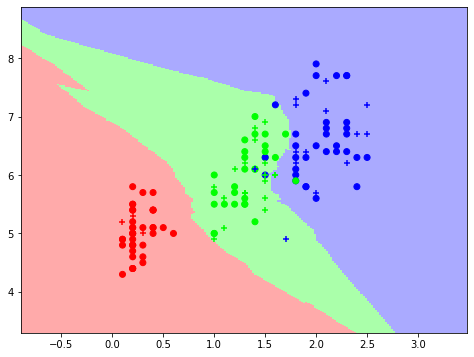

training score 0.9595959595959596
testing score 0.9215686274509803
nearest neighbors number is 7


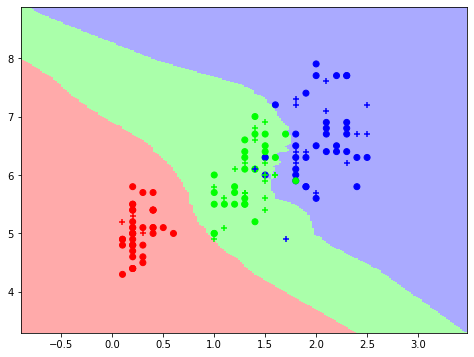

training score 0.9696969696969697
testing score 0.9215686274509803
nearest neighbors number is 9


In [56]:
knna(iris_pw_sl)

Here, if we take k=3, then the training score is about 0.97 and the testing score is about 0.92. 

## Petal Length vs. Sepal Width

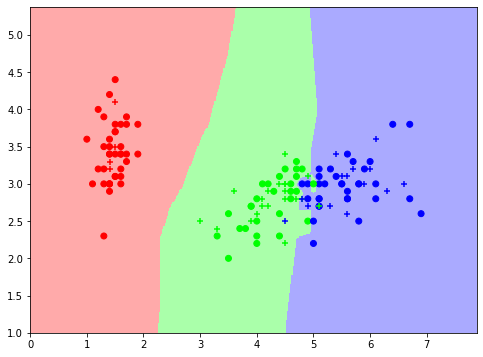

training score 1.0
testing score 0.9215686274509803
nearest neighbors number is 1


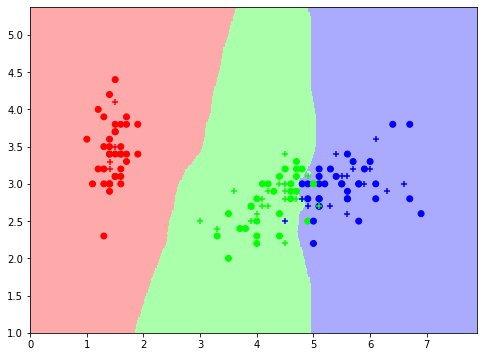

training score 0.9797979797979798
testing score 0.9411764705882353
nearest neighbors number is 3


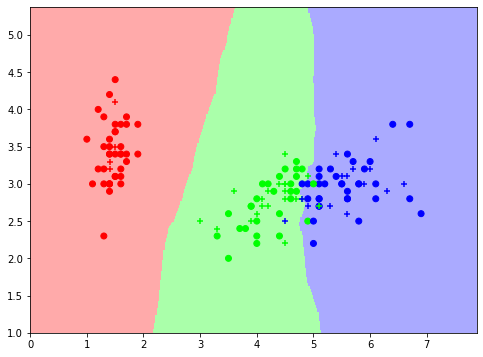

training score 0.9696969696969697
testing score 0.9215686274509803
nearest neighbors number is 5


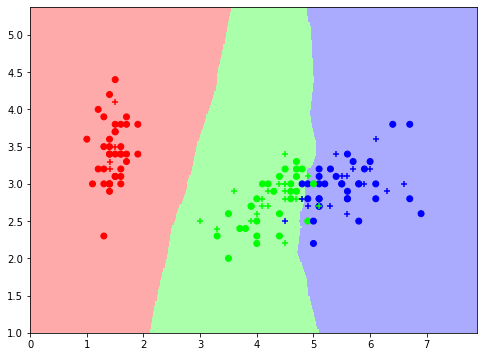

training score 0.9696969696969697
testing score 0.9215686274509803
nearest neighbors number is 7


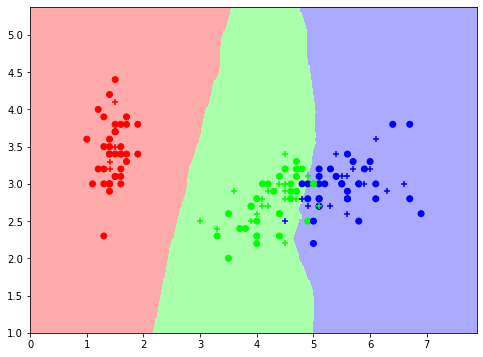

training score 0.9696969696969697
testing score 0.9215686274509803
nearest neighbors number is 9


In [57]:
knna(iris_pl_sw)

Here, taking k=3, the training score is about 0.98 and the testing score is about 0.94. 

Overall, we can see that using this k nearest neighbor classification, focusing on Sepal Length vs Sepal Width would give us the worst results (0.88,0.75). The best classification (before PCA) is probably Petal Length vs. Petal Width with results (0.97,0.96). 

In [67]:
from sklearn import neighbors
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
iris.head()
y=iris['flower type']
x=iris.drop('flower type',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
Test = []
Train = []
for n_neighbors in [1, 2, 3, 5, 7, 9, 11, 13, 15]:
    clf = KNeighborsClassifier(n_neighbors, weights='uniform',algorithm='auto')
    clf.fit(x_train, y_train)
    print('Working on k=%i'%(n_neighbors))
    trainacc =  clf.score(x_train,y_train)
    testacc = clf.score(x_test,y_test)
    print('\tThe training accuracy is %.2f'%(trainacc))
    print('\tThe testing accuracy is %.2f'%(testacc))
    Train.append(trainacc)
    Test.append(testacc)
    ypred= clf.predict(x)
    #print("Accuracy:", metrics.accuracy_score(y, ypred))
    conf = confusion_matrix(y, ypred)
    print(conf)
    print( '\n')
    ypred

Working on k=1
	The training accuracy is 1.00
	The testing accuracy is 0.93
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]


Working on k=2
	The training accuracy is 0.98
	The testing accuracy is 0.93
[[50  0  0]
 [ 0 49  1]
 [ 0  3 47]]


Working on k=3
	The training accuracy is 0.97
	The testing accuracy is 0.97
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


Working on k=5
	The training accuracy is 0.97
	The testing accuracy is 0.97
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


Working on k=7
	The training accuracy is 0.98
	The testing accuracy is 0.97
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


Working on k=9
	The training accuracy is 0.97
	The testing accuracy is 1.00
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]


Working on k=11
	The training accuracy is 0.95
	The testing accuracy is 1.00
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]


Working on k=13
	The training accuracy is 0.96
	The testing accuracy is 1.00
[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]


Working on k=15
	The training accuracy is 0.97
	The testing accuracy is 1.00
[

# Using PCA

In [62]:
from sklearn.decomposition import PCA

XPCA = PCA(n_components=3).fit_transform(data(iris))

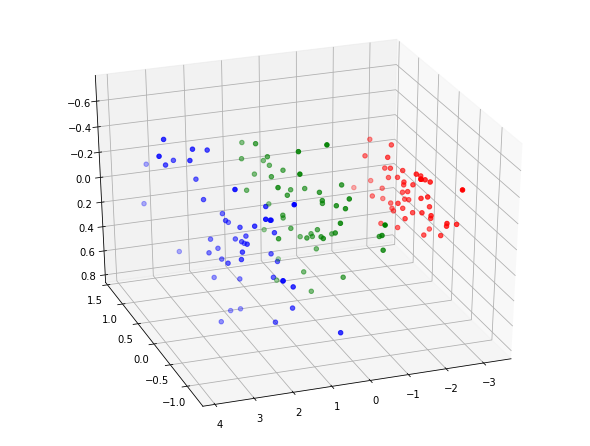

In [63]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(XPCA[flower_type(iris)==0, 0], XPCA[flower_type(iris)==0, 1], XPCA[flower_type(iris)==0, 2], c='r')
ax.scatter(XPCA[flower_type(iris)==1, 0], XPCA[flower_type(iris)==1, 1], XPCA[flower_type(iris)==1, 2], c='g')
ax.scatter(XPCA[flower_type(iris)==2, 0], XPCA[flower_type(iris)==2, 1], XPCA[flower_type(iris)==2, 2], c='b')
py.show()

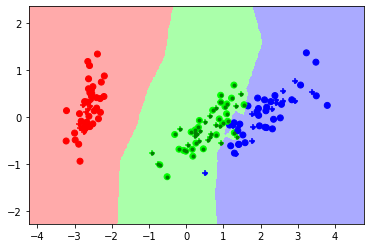

training score 1.0
testing score 0.9803921568627451


In [64]:
py.plot(XPCA[flower_type(iris)==0,0],XPCA[flower_type(iris)==0,1],'r.')
py.plot(XPCA[flower_type(iris)==1,0],XPCA[flower_type(iris)==1,1],'g.')
py.plot(XPCA[flower_type(iris)==2,0],XPCA[flower_type(iris)==2,1],'b.')
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
runTest(clf,XPCA[:,[0,1]],flower_type(iris))

Using PCA already gives us a much better training score and testing score with k=1. 

# Stadardizing the Data First

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler=StandardScaler()

In [77]:
scaler.fit(iris.drop('flower type',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [78]:
scaled_features = scaler.transform(iris.drop('flower type',axis=1))

In [79]:
iris_feat = pd.DataFrame(scaled_features,columns=iris.columns[:-1])
iris_feat.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## Train_Test_Split

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,iris['flower type'],
                                                    test_size=0.30)

## Using KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
knn = KNeighborsClassifier(n_neighbors=1)

In [84]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [85]:
pred = knn.predict(X_test)

## Predictions and Evaluations

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

In [87]:
print(confusion_matrix(y_test,pred))

[[10  0  0]
 [ 0 14  1]
 [ 0  0 20]]


In [88]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.93      0.97        15
           2       0.95      1.00      0.98        20

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Choosing a K value

Use the elbow method to pick a good K value

In [89]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

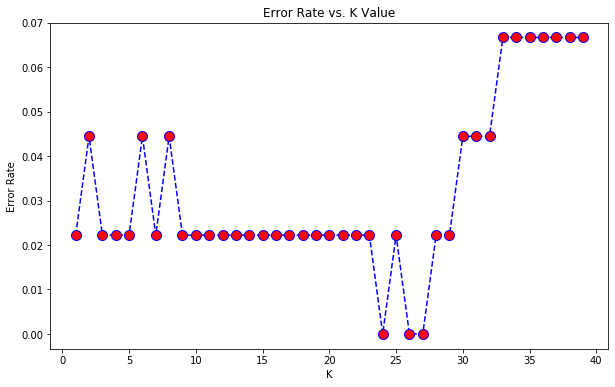

In [90]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [91]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[10  0  0]
 [ 0 14  1]
 [ 0  0 20]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.93      0.97        15
           2       0.95      1.00      0.98        20

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Train a Model 

Train a support vector machine classifer 

Call the SVC() model from sklearn and fit the model to the training datam

In [94]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Model Evaluation 

In [95]:
predictions = svc_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [96]:
print(confusion_matrix(y_test,predictions))

[[10  0  0]
 [ 0 14  1]
 [ 0  0 20]]


In [97]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.93      0.97        15
           2       0.95      1.00      0.98        20

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

